In [11]:
# core and utility packages
import pandas as pd
import numpy as np
import itertools
import keras


# visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

# Load the data
train = pd.read_csv("zone_train.csv")
test = pd.read_csv("zone_test.csv")
train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V2960,V2961,V2962,V2963,V2964,V2965,V2966,V2967,V2968,V2969
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
Y_train = train["V1"]
Y_test = test["V1"]
X_train = train.drop(labels = ["V1"],axis = 1) 
test = test.drop(labels = ["V1"],axis = 1) 
X_train.shape


(12000, 2968)

In [13]:
X_train.shape

(12000, 2968)

In [14]:
X_train = X_train.values.reshape(-1,53,56,1)
test = test.values.reshape(-1,53,56,1)
print(X_train)
print(test)

[[[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 ...


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]

In [15]:
X_train.shape


(12000, 53, 56, 1)

In [16]:
test.shape

(2400, 53, 56, 1)

In [17]:
from keras.utils import to_categorical
Y_train = to_categorical(Y_train, num_classes=2)
Y_test = to_categorical(Y_train, num_classes=2)

In [18]:
#x_training, x_validation, y_training, y_validation = train_test_split(X_train,
#                                                                      Y_train,
#                                                                      test_size=0.1,
#                                                                      random_state=2)


In [19]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
cnn=Sequential()
cnn.add(Conv2D(filters=32,
               kernel_size=(5,5),
               input_shape=(53,56,1),
               activation="relu",
               padding="same")) #3(RGB共3個特徵)*3*3(3*3過濾器)*32(過濾器)+32(bias 激活個數)
cnn.add(MaxPool2D(pool_size=(2,2)))#池化
cnn.add(Conv2D(filters=64,
               kernel_size=(3,3),
               activation="relu",
               padding="same"))#32(32個特徵)*3*3(3*3過濾器)*64(過濾器)+64(bias 激活個數)
###後面沒有再加卷積就沒必要再池化
cnn.add(MaxPool2D(pool_size=(2,2),strides=2))#池化
cnn.add(Conv2D(filters=128,
               kernel_size=(3,3),
               activation="relu",
               padding="same"))#32(32個特徵)*3*3(3*3過濾器)*64(過濾器)+64(bias 激活個數)
cnn.add(MaxPool2D(pool_size=(2,2)))#池化

cnn.add(Flatten())###MLP前要先展平
#cnn.add(Dense(units=1024,activation="relu"))##原本一萬多減一個位數取1000多
#cnn.add(Dense(units=128,activation="relu"))
#cnn.add(Dense(units=10,activation="softmax"))

cnn.add(Dense(units=625,activation="relu")) ###為了隨機dropout數量才增多一點
cnn.add(Dropout(0.5))
cnn.add(Dense(units=2,activation="softmax"))


cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 53, 56, 32)        832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 28, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 7, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5376)              0         
__________

In [20]:
cnn.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

train_history=cnn.fit(X_train,Y_train,batch_size=256,epochs=40,
          validation_split=0.1,verbose=2)##verbose 是否印出log  2表示印出重要log即可不用太詳細
#validation loss 沒平坦 epochs就要再加

Train on 10800 samples, validate on 1200 samples
Epoch 1/40
 - 63s - loss: 0.7062 - acc: 0.5655 - val_loss: 0.5802 - val_acc: 0.6892
Epoch 2/40
 - 65s - loss: 0.4110 - acc: 0.8134 - val_loss: 0.3773 - val_acc: 0.7842
Epoch 3/40
 - 65s - loss: 0.3004 - acc: 0.8791 - val_loss: 0.4181 - val_acc: 0.7767
Epoch 4/40
 - 65s - loss: 0.2512 - acc: 0.9023 - val_loss: 0.3487 - val_acc: 0.8292
Epoch 5/40
 - 65s - loss: 0.2142 - acc: 0.9164 - val_loss: 0.2417 - val_acc: 0.8858
Epoch 6/40
 - 66s - loss: 0.1860 - acc: 0.9281 - val_loss: 0.2275 - val_acc: 0.8958
Epoch 7/40
 - 66s - loss: 0.1761 - acc: 0.9329 - val_loss: 0.1768 - val_acc: 0.9125
Epoch 8/40
 - 67s - loss: 0.1747 - acc: 0.9343 - val_loss: 0.1801 - val_acc: 0.9108
Epoch 9/40
 - 66s - loss: 0.1490 - acc: 0.9426 - val_loss: 0.1808 - val_acc: 0.9125
Epoch 10/40
 - 66s - loss: 0.1476 - acc: 0.9428 - val_loss: 0.2173 - val_acc: 0.8975
Epoch 11/40
 - 65s - loss: 0.1367 - acc: 0.9475 - val_loss: 0.1670 - val_acc: 0.9242
Epoch 12/40
 - 65s - loss

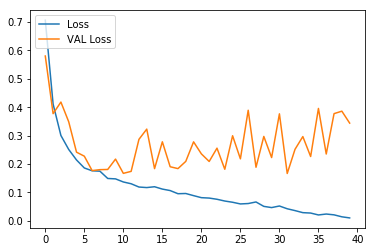

In [21]:
plt.plot(train_history.history["loss"])
plt.plot(train_history.history["val_loss"])
plt.legend(["Loss","VAL Loss"],loc="upper left")

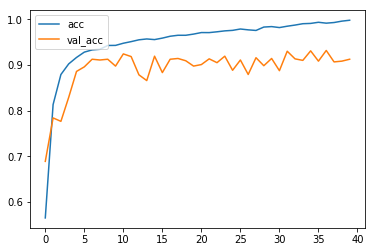

In [22]:
plt.plot(train_history.history["acc"])
plt.plot(train_history.history["val_acc"])
plt.legend(["acc","val_acc"],loc="upper left")

In [23]:
predictions = cnn.predict_classes(test, verbose=1)
test1 = pd.read_csv("zone_test.csv")

dataframe = pd.DataFrame({'a_name':predictions,'b_name':test1["V1"]})
#將DataFrame儲存為csv,index表示是否顯示行名，default=True
dataframe.to_csv("predictions_zone.csv",index=False,sep=',')

2400/2400 [==============================] - 6s 3ms/step


In [29]:
1-sum(abs(test1["V1"]-predictions))/2400

0.94125

In [24]:
#https://support.hdfgroup.org/products/java/
cnn.save("zone.h5")

In [25]:
from keras.models import load_model
loadcnn=load_model("zone.h5")
loadcnn.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [26]:
predictions = loadcnn.predict_classes(test, verbose=1)

2400/2400 [==============================] - 7s 3ms/step


38